# Working with Unlabeled Data

The goal of clustering is to find a natural grouping in data so that items in the same cluster are more similar to each other than to those from different clusters.


## k-means clustering with scikit-learn

The k-means algorithm belongs to the category of prototype-based clustering. Prototype-based clustering means that each cluster is represented by a prototype, which is usually either the centroid (average) of similar points with continuous features, or the medoid (the most representative or the point that minimizes the distance to all other points that belong to a particular cluster) in the case of categorical features. While k-means is very good at identifying clusters with a spherical shape, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, k,  a *priori*. An inappropriate choice for k can result in poor clustering performance.

> When we are applying k-means to real-world data using a Euclidean distance metric, we want to make sure that the features are measured on the same scale and apply z-score standardization or min-max scaling if necessary.

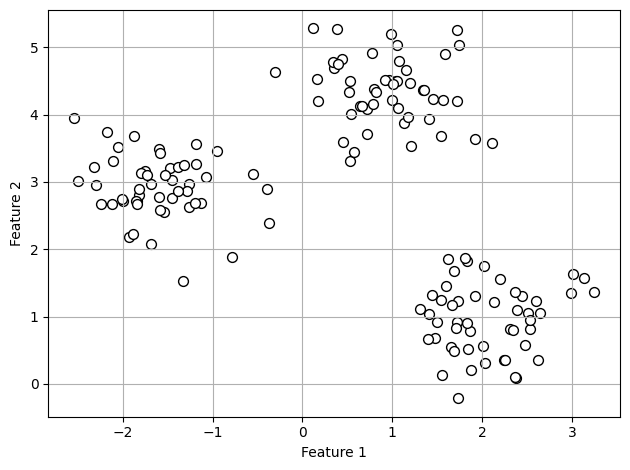

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0
)

plt.scatter(X[:,0], X[:,1],
            c='white', marker='o',
            edgecolor='black',
            s=50
            )

plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.grid()

plt.tight_layout()


> In real-world applications of clustering, we do not have any ground-truth category information (information provided as empirical evidence as opposed to inference) about those examples; if we were given class labels, this task would fall into the category of supervised learning. Thus, our goal is to group the examples based on their feature similarities, which can be achieved using the k-means algorithm.

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0
            )


y_km = km.fit_predict(X)



Using the preceding code, we set the number of desired clusters to 3; having to specify the number of
clusters a priori is one of the limitations of k-means. We set n_init=10 to run the k-means clustering
algorithms 10 times independently, with different random centroids to choose the final model as the
one with the lowest SSE. Via the max_iter parameter, we specify the maximum number of iterations
for each single run (here, 300). Note that the k-means implementation in scikit-learn stops early if it
converges before the maximum number of iterations is reached. However, it is possible that k-means
does not reach convergence for a particular run, which can be problematic (computationally expensive)
if we choose relatively large values for max_iter. One way to deal with convergence problems
is to choose larger values for tol, which is a parameter that controls the tolerance with regard to the
changes in the within-cluster SSE to declare convergence. In the preceding code, we chose a tolerance
of 1e-04 (=0.0001).

> A problem with k-means is that one or more clusters can be empty. Note that this problem does not exist for k-medoids or fuzzy C-means. 

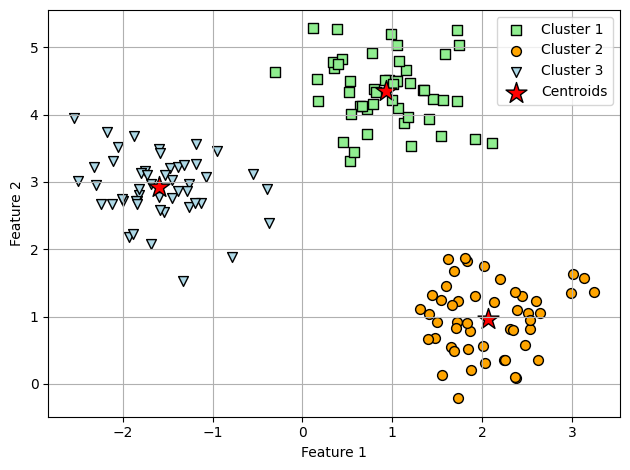

In [4]:
plt.scatter(   X[y_km == 0, 0],
                X[y_km == 0, 1],
                s=50, c='lightgreen',
                marker='s', edgecolor='black',
                label='Cluster 1')


plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')


plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')


plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')



plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

> Although k-means worked well on this toy dataset, we still have the drawback of having to specify the number of clusters, k, a priori. The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher-dimensional dataset that cannot be visualized. The other properties of k-means are that clusters do not overlap and are not hierarchical, and we also assume that there is at least one item in each cluster.

## A smarter way of placing the initial cluster centroids using k-means++

Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.

> To use k-means++ with scikit-learn’s KMeans object, we just need to set the init parameter to 'k-means++'. In fact, 'k-means++' is the default argument to the init parameter, which is strongly recommended in practice.

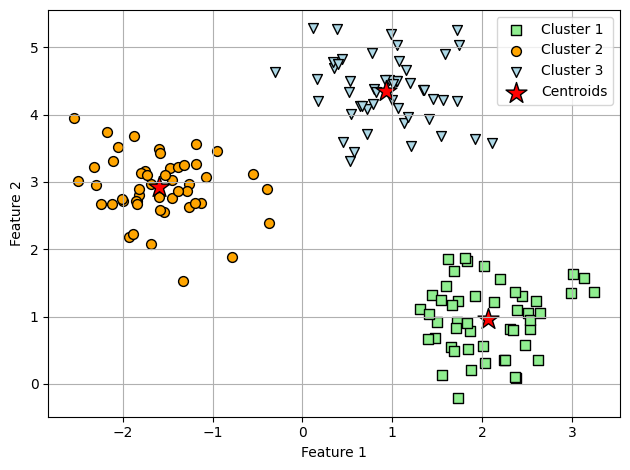

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0
            )


y_km = km.fit_predict(X)


plt.scatter(   X[y_km == 0, 0],
                X[y_km == 0, 1],
                s=50, c='lightgreen',
                marker='s', edgecolor='black',
                label='Cluster 1')


plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')


plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')


plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')



plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### Hard vs soft clustering

**Hard clustering** describes a family of algorithms where each example in a dataset is assigned to exactly
one cluster, as in the k-means and k-means++ algorithms that we discussed earlier in this chapter. In
contrast, algorithms for **soft clustering** (sometimes also called fuzzy clustering) assign an example
to one or more clusters. A popular example of soft clustering is the fuzzy C-means (FCM) algorithm
(also called soft k-means or fuzzy k-means).

## Using the elbow method to find the optimal number of clusters


One of the main challenges in unsupervised learning is that we do not know the definitive answer. We
don’t have the ground-truth class labels in our dataset. Thus, to quantify the quality of clustering, we need to use
intrinsic metrics—such as the within-cluster SSE (distortion)—to compare the performance of different
k-means clustering models.

Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate
the optimal number of clusters, k, for a given task. We can say that if k increases, the distortion will
decrease. This is because the examples will be closer to the centroids they are assigned to. The idea
behind the elbow method is to identify the value of k where the distortion begins to increase most
rapidly, which will become clearer if we plot the distortion for different values of k:

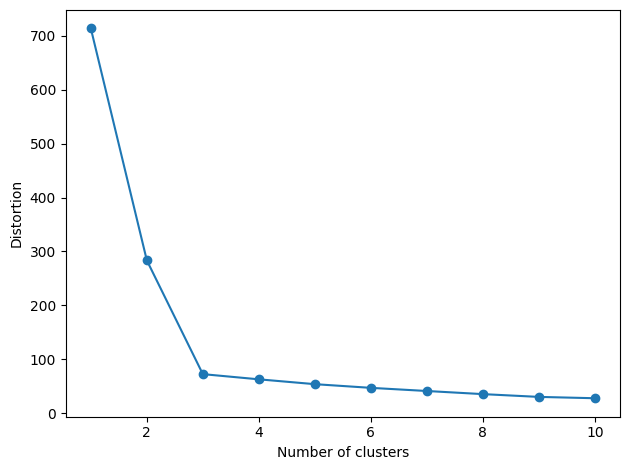

In [8]:
distortions = []

for cluster in range(1, 11):
    km = KMeans(n_clusters=cluster,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0
            )

    # for the model
    km.fit(X)
    
    # Append SSE to distortions list
    distortions.append(km.inertia_)
    
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Organizing clusters as a hierarchical tree


One advantage of the hierarchical clustering algorithm is that it allows us to plot dendrograms
(visualizations of a binary hierarchical clustering), which can help with the interpretation of
the results by creating meaningful taxonomies. Another advantage of this hierarchical approach is
that we do not need to specify the number of clusters upfront.

The two main approaches to hierarchical clustering are **agglomerative** and **divisive** hierarchical clustering.
In divisive hierarchical clustering, we start with one cluster that encompasses the complete
dataset, and we iteratively split the cluster into smaller clusters until each cluster only contains one
example.

### Agglomerative Clustering
The two standard algorithms for agglomerative hierarchical clustering are **single linkage** and **complete
linkage**. Using single linkage, we compute the distances between the most similar members for each
pair of clusters and merge the two clusters for which the distance between the most similar members
is the smallest. The complete linkage approach is similar to single linkage but, instead of comparing
the most similar members in each pair of clusters, we compare the most dissimilar members to perform
the merge.

## Using DBSCAN 


density-based spatial clustering of applications with noise (DBSCAN), does not make assumptions about spherical clusters like k-means, nor does it partition the dataset into hierarchies that require a manual cut-off point.

> One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn’t necessarily assign each point to a cluster but is capable of removing noise points.

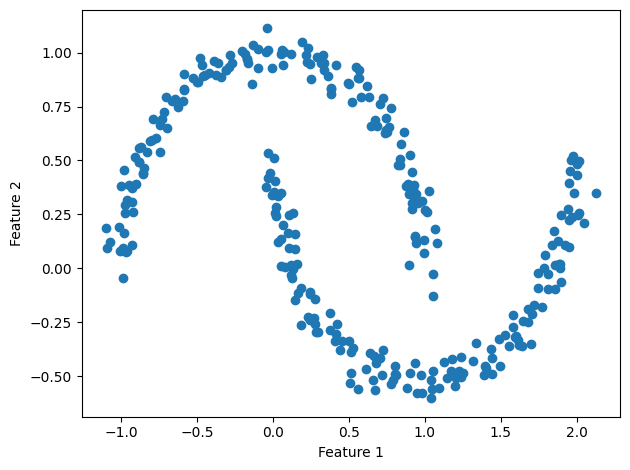

In [9]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=300, noise=0.05, random_state=0)


plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

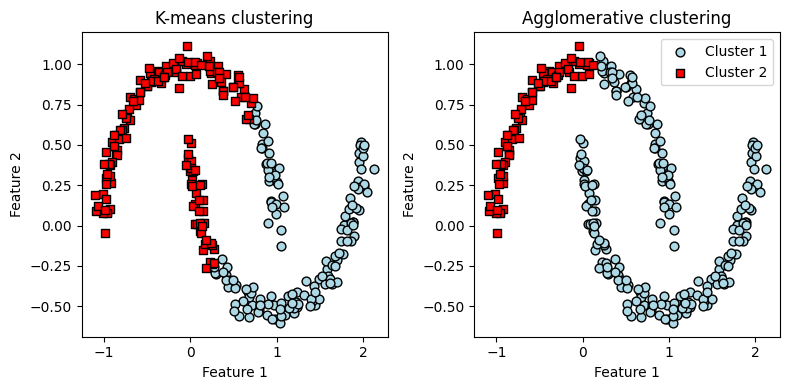

In [11]:
from sklearn.cluster import AgglomerativeClustering

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))


km = KMeans(n_clusters=2, random_state=0)


y_km = km.fit_predict(X)


ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')

ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')


ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')


# ac with 2 clusters
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')


y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')


ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')


ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()


> Based on the visualized clustering results, we can see that the k-means algorithm was unable to separate the two clusters, and also, the hierarchical clustering algorithm was challenged by those complex shapes.

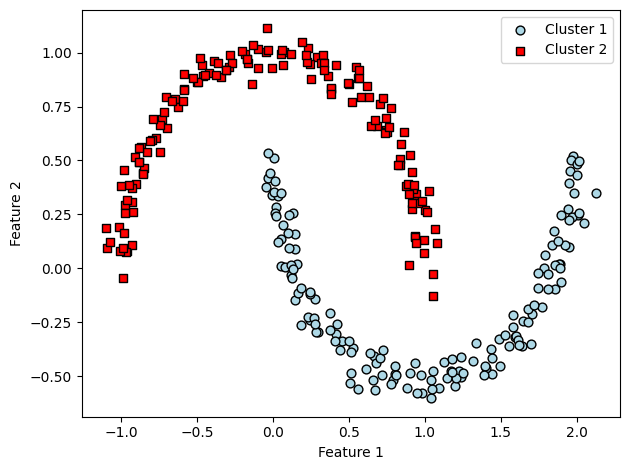

In [12]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')


plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

However, we should also note some of the disadvantages of DBSCAN. With an increasing number of
features in our dataset—assuming a fixed number of training examples—the negative effect of the
curse of dimensionality increases. This is especially a problem if we are using the Euclidean distance
metric. However, the problem of the curse of dimensionality is not unique to DBSCAN: it also affects
other clustering algorithms that use the Euclidean distance metric, for example, k-means and hierarchical
clustering algorithms. In addition, we have two hyperparameters in DBSCAN (MinPts and 𝜀𝜀 )
that need to be optimized to yield good clustering results. Finding a good combination of MinPts and
𝜀𝜀 can be problematic if the density differences in the dataset are relatively large.